<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Elements" data-toc-modified-id="Introduction-to-Elements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Elements</a></span><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#What-are-elements?" data-toc-modified-id="What-are-elements?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>What are elements?</a></span><ul class="toc-item"><li><span><a href="#Creating-elements" data-toc-modified-id="Creating-elements-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Creating elements</a></span><ul class="toc-item"><li><span><a href="#A-simple-curve" data-toc-modified-id="A-simple-curve-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>A simple curve</a></span></li><li><span><a href="#Annotating-the-curve" data-toc-modified-id="Annotating-the-curve-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Annotating the curve</a></span></li><li><span><a href="#Turning-arrays-into-elements" data-toc-modified-id="Turning-arrays-into-elements-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Turning arrays into elements</a></span></li></ul></li><li><span><a href="#Selecting-columns-from-tables-to-make-elements" data-toc-modified-id="Selecting-columns-from-tables-to-make-elements-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Selecting columns from tables to make elements</a></span></li><li><span><a href="#Dimension-labels" data-toc-modified-id="Dimension-labels-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Dimension labels</a></span></li><li><span><a href="#Composing-elements-together" data-toc-modified-id="Composing-elements-together-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Composing elements together</a></span><ul class="toc-item"><li><span><a href="#Layouts" data-toc-modified-id="Layouts-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>Layouts</a></span></li><li><span><a href="#Overlays" data-toc-modified-id="Overlays-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Overlays</a></span></li></ul></li></ul></li><li><span><a href="#Onwards" data-toc-modified-id="Onwards-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Onwards</a></span></li></ul></li></ul></div>

<br>
<img src="https://github.com/pyviz/pyviz/raw/master/notebooks/assets/hv_gv_bk_ds_pa.png" width="50%" style="margin: 0px 25%">

# Introduction to Elements

## Preliminaries

if the `pyviz` environment has been correctly created and activated using the instruction listed in the [README.md](https://github.com/andersy005/beyond-matplotlib-tutorial-sea-2018/blob/master/README.md) file, the following imports should run and `hv.extension('bokeh')` should present a small HoloViews logo:



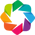

In [1]:
import numpy as np
import pandas as pd 
import holoviews as hv
import warnings
warnings.filterwarnings('ignore')
hv.extension('bokeh')

Here we import the [NumPy](http://numpy.org) and [pandas](http://pandas.org) data libraries with their standard abbreviations, plus HoloViews with its standard abbreviation ``hv``. The line reading ``hv.extension('bokeh')`` loads and activates the bokeh plotting backend, so all visualizations will be generated using [Bokeh](bokeh.pydata.org). We will see how to use matplotlib instead of bokeh later in the tutorial [Customizing Visual Appearance](./02-customizing-visual-appearance.ipynb).

## What are elements?

In short, elements are HoloViews' most basic, core primitives. All the various types of ``hv.Element`` accept semantic metadata that allows their input data to be given an automatic, visual representation. Most importantly, element objects always preserve the raw data they are supplied.

In this notebook we will explore a number of different element types and examine some of the ways that elements can supplement the supplied data with useful semantic data. To choose your own types to use in the exercises, you can browse them all in the [reference gallery](http://holoviews.org/reference/index.html).


### Creating elements
All basic elements accept their data as a single, mandatory positional argument which may be supplied in a number of different formats, some of which we will now examine. A handful of *annotation* elements are exceptions to this rule, namely ``Arrow``, ``Text``, ``Bounds``, ``Box`` and ``Ellipse``, as they require additional positional arguments.


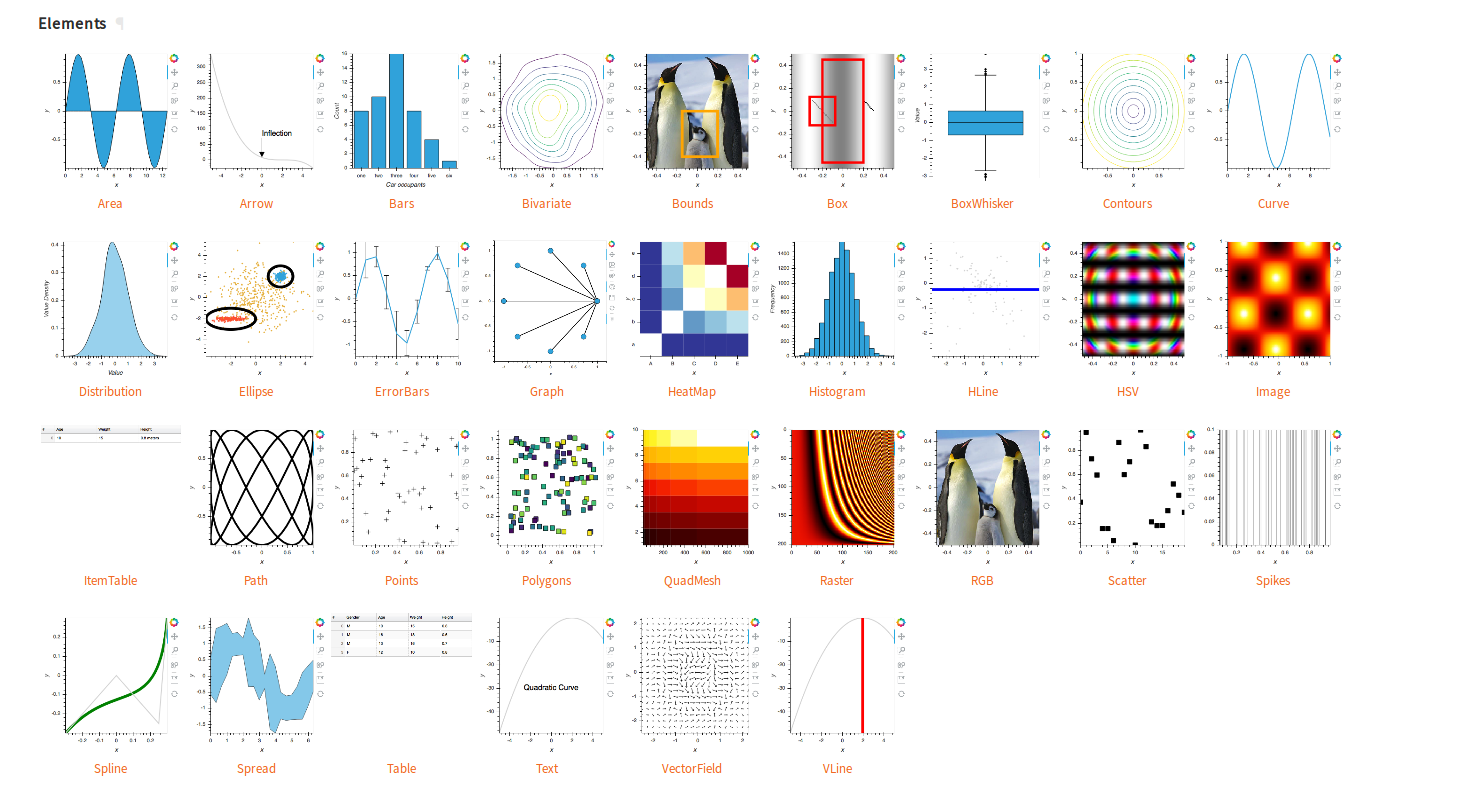

#### A simple curve
To start with a simple example, we will sample a pair of parametrical equations in which $x$ and $y$ are both functions of a third independent parameter $time$.

$x = \sin(2t)$

$y = \sin(3t)$

at 100 different values between $0$ and $ 6.28$ and wrap that data in a HoloViews element:

xs = [i for i in range(0, 100)]
ys = [ -6 * (x ** 3) + 8 * (x ** 2) + (7 * x) - 4 for x in xs]
dys = [ -18 * (x ** 2) + 16 * x + 7 for x in xs]
dys = [ -18 * (x ** 2) + 285 * x + 30000 for x in xs]
dys = [ 200 + (1.5 * x) - 0.5 * 9.8 * ( x** 2) for x in xs]

h0 = 10
theta = 53
v0 = 25

v_x0 = v0 * np.cos(np.deg2rad(theta))
v_y0 = v0 * np.sin(np.deg2rad(theta))

times = [i for i in range(0, 200)]
x = [v_x0 * t for t in times]
y = [-16 * (t ** 2) +  (v_y0 * t) + h0 for t in times]
simple_curve = hv.Curve((xs, ys))
simple_deriv_curve = hv.Curve((xs, dys))
#simple_curve = hv.Curve((t, y))

In [2]:
times = np.linspace(0, 6.28, 100)
x = np.sin(2 * times)
y = np.cos(3 * times)
simple_curve = hv.Curve((x, y))
simple_curve

:Curve   [x]   (y)

Here we supplied two arrays of values as a tuple to [``hv.Curve``]((http://build.holoviews.org/reference/elements/bokeh/Curve.html), assigned the result to the attribute ``simple_curve``, and let Jupyter display the object using its default visual representation.  As you can see, that default visual representation is a Bokeh plot, which is automatically generated by HoloViews when Jupyter requests it. But ``simple_curve`` itself is just a wrapper around your data, not a plot, and you can choose other representations that are not plots.  For instance, printing the object will give you a purely textual representation instead:

In [3]:
print(simple_curve)

:Curve   [x]   (y)


The textual representation indicates that this object is a continuous mapping from `x` to `y`, which is how HoloViews knew to render it as a continuous curve.  You can also access the full original data which has been converted to a Pandas dataframe:


In [4]:
simple_curve.data.head()

x         y
0  0.000000  1.000000
1  0.126529  0.981947
2  0.251023  0.928440
3  0.371483  0.841410
4  0.485972  0.724000

There are a number of similar elements to [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) such as [``Area``](http://build.holoviews.org/reference/elements/bokeh/Area.html) and [``Scatter``](http://build.holoviews.org/reference/elements/bokeh/Scatter.html), which you can try out for yourself in the exercises.

In [5]:
# Exercise: Try switching hv.Curve with hv.Area and hv.Scatter

In [6]:
# Optional: 
# Look at the .data attribute of the elements you created to see the 
# raw data (as a pandas DataFrame)

In [7]:
hv.Scatter((x, y))

:Scatter   [x]   (y)

#### Annotating the curve 

Wrapping your data (``x`` and ``y``),  here as a HoloViews element is sufficient to make it visualizable, but there are many other aspects of the data that we can capture to convey more about its meaning to HoloViews. For instance, we might want to specify what the x-axis and y-axis actually correspond to, in the real world. 

In [8]:
trajectory = hv.Curve((x, y), kdims=['variable-1'], vdims=['variable-2'])
trajectory

:Curve   [variable-1]   (variable-2)

Here we have added *semantic* information about our data to the [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element.  Specifically, we told HoloViews that the ``kdim`` or *key dimension* of our data corresponds to the real-world independent variable ('variable-2'), and the ``vdim`` or *value dimension* 'variable-1' is the real-world dependent variable. Even though the additional information we provided is about the *data*, not directly about the plot, HoloViews is designed to reveal the properties of your data accurately, and so the axes now update to show what these dimensions represent.

#### Turning arrays into elements
The curve above was constructed from a list of x-values and a list of y-values. Next we will create an element using an entirely different datatype, namely a [NumPy](http://www.numpy.org/) array:

In [9]:
x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
xx, yy = np.meshgrid(x, y)
arr = np.sin(np.cos(np.tan(xx))) * np.sin(np.cos(np.tan(yy)))
image = hv.Image(arr)

As above, we know that this data was sampled from a continuous function, but this time the data is mapping from *two* key dimensions, so we declare it as an [``hv.Image``](http://build.holoviews.org/reference/elements/bokeh/Image.html) object.  As you might expect, an ``Image`` object is visualized as an image by default:

In [10]:
image

:Image   [x,y]   (z)

In [11]:
# Exercise: Try visualizing different two-dimensional arrays.
# You can try a new function entirely or simple modifications of the existing one
# E.g., explore the effect of squaring and cubing the tangent term

In [12]:
# Optional: Try supplying appropriate labels for the x- and y- axes
# Hint: The x,y positions are how you *index* (or key) the array *values* (so x and y are both kdims)

### Selecting columns from tables to make elements


In addition to basic Python datatypes and [xarray](xarray.pydata.org) and [NumPy](www.numpy.org) array types, HoloViews elements can be passed tabular data in the form of pandas [DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):


In [13]:
weather_station_data = pd.read_parquet('../datasets/weather_station_data.parquet')
weather_station_data.head()

date station  max_temp_f  min_temp_f  max_dewpoint_f  min_dewpoint_f  \
0 2000-01-01     CMI        54.0        40.0            48.0           -99.0   
1 2000-01-02     CMI        60.0        36.0            53.0           -99.0   
2 2000-01-03     CMI        48.0        35.0            46.0           -99.0   
3 2000-01-04     CMI        34.0        20.0            31.0           -99.0   
4 2000-01-05     CMI        28.0        19.0            23.0           -99.0   

   precip_in  avg_wind_speed_kts  avg_wind_drct   min_rh   avg_rh   max_rh  \
0       0.00             10.4543        178.361  52.1530  79.7005  92.8002   
1       0.00             14.4997        204.253  60.6015  83.9761  93.1369   
2       0.59             12.9379        340.772  81.4008  92.9263  96.2444   
3       0.00             14.5939        289.829  80.5226  83.5739  88.0248   
4       0.00             11.8946        172.923  77.5292  81.7780  84.7241   

   climo_high_f  climo_low_f  climo_precip_in  year  month  precip_cumsum_in  
0          33.3         18.2             0.09  2000      1              0.00  
1          33.2         18.1             0.09  2000      1              0.00  
2          33.2         18.0             0.09  2000      1              0.59  
3          33.2         17.8             0.09  2000      1              0.59  
4          33.1         17.7             0.09  2000      1              0.59

In [14]:
weather_station_data.tail()

date station  max_temp_f  min_temp_f  max_dewpoint_f  \
6205 2017-12-27     BMI        10.9        -6.0            -6.0   
6206 2017-12-28     BMI        14.0        -0.9             9.0   
6207 2017-12-29     BMI        16.0        10.9            14.0   
6208 2017-12-30     BMI        16.0        -2.0            14.0   
6209 2017-12-31     BMI         6.1        -7.1            -2.9   

      min_dewpoint_f  precip_in  avg_wind_speed_kts  avg_wind_drct   min_rh  \
6205            -9.9     0.0000             6.16852        345.754  49.3760   
6206            -5.1     0.0001             6.73189        151.130  66.1605   
6207             7.0     0.1400             4.28412        224.308  72.7307   
6208            -9.0     0.0001            12.89140        323.983  59.1993   
6209           -13.0     0.0001            11.12880        321.712  65.4725   

       avg_rh   max_rh  climo_high_f  climo_low_f  climo_precip_in  year  \
6205  69.2784  82.4207          33.5         16.4             0.07  2017   
6206  75.6914  84.0721          33.4         16.2             0.08  2017   
6207  85.8857  92.4429          33.3         16.1             0.07  2017   
6208  73.6299  92.4429          33.2         15.9             0.07  2017   
6209  73.5649  84.1749          33.1         15.8             0.07  2017   

      month  precip_cumsum_in  
6205     12          415.4548  
6206     12          415.4549  
6207     12          415.5949  
6208     12          415.5950  
6209     12          415.5951

In [15]:
# get a list of unique stations
weather_station_data['station'].unique()

array(['CMI', 'DEC', 'MDW', 'ORD', 'BMI'], dtype=object)

This dataset was retrieved from [The Iowa Environmental Mesonet (IEM)](http://mesonet.agron.iastate.edu/). It consists of data from Illinois’ five stations (Champaign, Decatur, Midway, O’Hare, 'Bloomington/Norm')

Let's build an element that helps us understand how the max temperature in Midway varies over time. As our dataframe contains weather data for five stations, let us select the Midway from the table and create a [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element from it:

In [16]:
# select data for Midway station only 
midway = weather_station_data[weather_station_data['station'] == 'MDW']

In [17]:
midway.head()

date station  max_temp_f  min_temp_f  max_dewpoint_f  min_dewpoint_f  \
0 2000-01-01     MDW        50.0        39.0            41.0           -99.0   
1 2000-01-02     MDW        61.0        37.0            51.0           -99.0   
2 2000-01-03     MDW        41.0        34.0            38.0           -99.0   
3 2000-01-04     MDW        34.0        23.0            31.0           -99.0   
4 2000-01-05     MDW        27.0        16.0            21.0           -99.0   

   precip_in  avg_wind_speed_kts  avg_wind_drct   min_rh   avg_rh   max_rh  \
0       0.00             6.20447       188.3880  45.9305  71.7252  92.7696   
1       0.01            13.24150       229.7760  49.0803  82.4467  95.8237   
2       0.14            12.42850        11.9632  77.8944  89.9206  96.1611   
3       0.01            10.81790       283.1210  71.6698  78.6554  87.7029   
4       0.00            11.99090       194.3730  68.3243  77.5807  87.7029   

   climo_high_f  climo_low_f  climo_precip_in  year  month  precip_cumsum_in  
0          32.0         19.1             0.08  2000      1              0.00  
1          31.9         19.0             0.08  2000      1              0.01  
2          31.8         18.9             0.07  2000      1              0.15  
3          31.7         18.8             0.08  2000      1              0.16  
4          31.6         18.7             0.08  2000      1              0.16

In [18]:
max_temperature_curve = hv.Curve(midway, kdims=['date'], vdims=['max_temp_f'])
max_temperature_curve

:Curve   [date]   (max_temp_f)

In this case, declaring the ``kdims`` and ``vdims`` does not simply declare the axis labels, it allows HoloViews to discover which columns of the data should be used from the dataframe for each of the axes.

In [19]:
### Exercise: Plot the max temperature over year

### Dimension labels

In this example, the simplistic axis labels are starting to get rather limiting. Changing the ``kdims`` and ``vdims`` is no longer trivial either, as they need to match the column names in the dataframe. Is the only solution to rename the columns in our dataframe to something more descriptive but more awkward to type?

Luckily, no. The recommendation is that you continue to use short, programmer and pandas-friendly, [tab-completeable](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe-column-attribute-access-and-ipython-completion) column names as these are also the most convenient dimension names to use with HoloViews.
 
What you should do instead is set the *dimension labels*, using the fact that dimensions are full, rich objects behind the scenes: 

In [20]:
max_temp = max_temperature_curve.redim.label(max_temp_f='Max temperature')
max_temp

:Curve   [date]   (max_temp_f)

 With the ``redim`` method, we have associated a *dimension label* with the ``growth`` dimension, resulting in a new element called ``gdp_growth`` (you can check for yourself that ``growth_curve`` is unchanged). Let's look at what the new dimension contains:

In [21]:
max_temp.vdims

[Dimension('max_temp_f', label='Max temperature')]

The ``redim`` utility lets you easily change other [dimension parameters](), and as an example let's give maximum temperature dimension the appropriate unit:


In [22]:
max_temp.redim.unit(max_temp_f='F')

:Curve   [date]   (max_temp_f)

### Composing elements together

Viewing a single element at a time often conveys very little information for the space used. In this section, we introduce the two composition operators ``+`` and ``*`` to build [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) and [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) objects.

#### Layouts
Earlier on we were casting a polynomial to different element types. Viewing the different types was awkward, wasting lots of vertical space in the notebook. What we will often want to do is view these elements side by side:

In [23]:
layout = trajectory + hv.Scatter(trajectory) + hv.Area(trajectory) + hv.Spikes(trajectory)
layout.cols(2)

:Layout
   .Curve.I   :Curve   [variable-1]   (variable-2)
   .Scatter.I :Scatter   [variable-1]   (variable-2)
   .Area.I    :Area   [variable-1]   (variable-2)
   .Spikes.I  :Spikes   [variable-1]   (variable-2)

What we have created with the ``+`` operator is an [``hv.Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) object (with a hint that a two-column layout is desired):

In [24]:
print(layout)

:Layout
   .Curve.I   :Curve   [variable-1]   (variable-2)
   .Scatter.I :Scatter   [variable-1]   (variable-2)
   .Area.I    :Area   [variable-1]   (variable-2)
   .Spikes.I  :Spikes   [variable-1]   (variable-2)


Now let us build a new layout by selecting elements from ``layout``:

In [25]:
layout.Curve.I + layout.Spikes.I

:Layout
   .Curve.I  :Curve   [variable-1]   (variable-2)
   .Spikes.I :Spikes   [variable-1]   (variable-2)

We see that a ``Layout`` lets us pick component elements via two levels of tab-completable attribute access. Note that by default the type of the element defines the first level of access and the second level of access automatically uses Roman numerals (because Python identifiers cannot start with numbers).

These two levels correspond to another type of semantic declaration that applies to the elements directly (rather than their dimensions), called ``group`` and ``label``.  Specifically, ``group`` allows you to declare what kind of thing this object is, while ``label`` allows you to label which specific object it is.  What you put in those declarations, if anything, will form the title of the plot:

In [26]:
particle = trajectory.relabel('Particle-1', group='Trajectory')
integral = hv.Area(trajectory).relabel('Filled', group='Trajectory')
labelled_layout = particle + integral
labelled_layout 

:Layout
   .Trajectory.Particle_hyphen_minus_1 :Curve   [variable-1]   (variable-2)
   .Trajectory.Filled                  :Area   [variable-1]   (variable-2)

#### Overlays

Layout places objects side by side, allowing it to collect (almost!) any HoloViews objects that you want to indicate are related.  Another operator ``*`` allows you to overlay elements into a single plot, if they live in the same space (with matching dimensions and similar ranges over those dimensions).  The result of ``*`` is an [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html):

In [27]:
trajectory * hv.Spikes(trajectory)

:Overlay
   .Curve.I  :Curve   [variable-1]   (variable-2)
   .Spikes.I :Spikes   [variable-1]   (variable-2)

The indexing system of [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) is identical to that of [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html).

In [28]:
# Exercise: Make an overlay of the Spikes object from layout on top of the filled trajectory area of labelled_layout

 One thing that is specific to Overlays is the use of color cycles to automatically differentiate between elements of the same type and ``group``:

In [29]:
particle_2 = particle.clone((np.sin(x), np.cos(y)), label='Particle-2')
particle + particle_2 + (particle * particle_2)

:Layout
   .Trajectory.Particle_hyphen_minus_1 :Curve   [variable-1]   (variable-2)
   .Trajectory.Particle_hyphen_minus_2 :Curve   [variable-1]   (variable-2)
   .Trajectory.I                       :Overlay
      .Trajectory.Particle_hyphen_minus_1 :Curve   [variable-1]   (variable-2)
      .Trajectory.Particle_hyphen_minus_2 :Curve   [variable-1]   (variable-2)

Here we use the ``clone`` method to make a particle-2 trajectory: the ``clone`` method create a new object that preserves semantic metadata while allowing overrides (in this case we override the input data and the ``label``).

As you can see, HoloViews can determine that the two overlaid curves will be distinguished by color, and so it also provides a legend so that the mapping from color to data is clear.


## Onwards 

Later in the tutorial, we will see how elements and the principles of composition extend to *containers* (such as ) which make data exploration quick, easy and interactive. Before we examine the container types, we will look at how to customize the appearance of elements, change the plotting extension and specify output formats.

For a quick demonstration related to what we will be covering, hit the kernel restart button (⟳) in the toolbar for this notebook, change ``hv.extension('bokeh')`` to ``hv.extension('matplotlib')`` in the first cell and rerun the notebook!